# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to **build a predictive model and determine the sales of each product at a particular store**.

|Variable|Description|
| ------------- |-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [ ]:
import pandas as pd
import numpy as np

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [2]:
#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
nMissingValues = data.isnull().sum().sort_values(ascending=False)
pMissingValues = (nMissingValues/data.isnull().count()*100).sort_values(ascending=False)
missingData = pd.concat([nMissingValues, pMissingValues],axis=1,keys=['Total', 'Percent'])
missingData

,Total,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
## Item_Outlet_Sales has a minimum that does not make sense 
# because it's too low.

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [63]:
# All data types are float or object.
# Create a list of categorical column names
categorical = data.dtypes[data.dtypes == 'object'].index.tolist()

data[categorical].head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1


In [11]:
# Get number of unique values
data[categorical].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


**Task:** How many products are there, how many stores, item types?


In [15]:
answerIndex = 'unique'

describeCategorical = data[categorical].describe()
# Answers:

print('# of unique products: ',describeCategorical.loc[answerIndex,'Item_Identifier'])
print('# of unique stores: ',describeCategorical.loc[answerIndex,'Outlet_Identifier'])
print('# of item types: ',describeCategorical.loc[answerIndex,'Item_Type'])

# of unique products:  1559
# of unique stores:  10
# of item types:  16


**Task:** Explore the numbers of each categorical variable.

In [65]:
# Remove the categorical variables that are less interesting to look at due to arbitrary values
categorical.remove('Outlet_Identifier')
categorical.remove('Item_Identifier')
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [50]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [67]:
# Look at the unique values and their counts for each categorical variable
for column in categorical[1:]:
    print(column,':', len(data[column].value_counts()),'unique values')
    print(data[column].value_counts(),'\n')

Item_Type : 16 unique values
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Size : 3 unique values
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type : 3 unique values
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type : 4 unique values
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [69]:
import seaborn as sns
import matplotlib as plt

In [72]:
%matplotlib inline

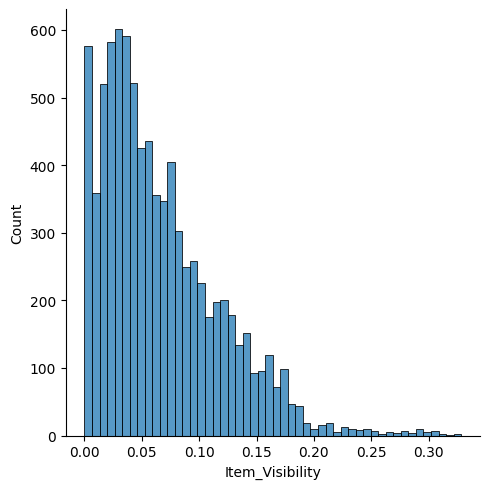

In [73]:
# Identify zero values
# 'Item_Visibility' has a minimum of zero. Plot data.
sns.displot(data=data,x='Item_Visibility')

In [76]:
# Look at the rows with zero item visibility:
# Numerical data
filter=data['Item_Visibility']==0
data[filter].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,436.000000,526.0,526.000000,526.000000,526.000000
mean,12.571766,0.0,138.117157,1997.918251,2222.542928
std,4.626252,0.0,63.372908,8.486795,1741.803049
min,4.590000,0.0,32.890000,1985.000000,33.290000
25%,8.490000,0.0,89.242850,1987.000000,891.339750
50%,12.150000,0.0,130.248100,1999.000000,1774.024100
75%,16.387500,0.0,184.383850,2004.000000,3182.524000
max,21.200000,0.0,264.791000,2009.000000,11445.102000


In [83]:
# Look at the rows with zero item visibility:
# # Categorical variable
for column in categorical[1:]:
    print(column,':', len(data[column][filter].value_counts()),'unique values')
    print('total rows with zero:',data[column][filter].count())
    print(data[column][filter].value_counts(),'\n')

Item_Type : 16 unique values
total rows with zero: 526
Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64 

Outlet_Size : 3 unique values
total rows with zero: 382
Medium    178
Small     145
High       59
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type : 3 unique values
total rows with zero: 526
Tier 3    213
Tier 2    169
Tier 1    144
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type : 4 unique values
total rows with zero: 526
Supermarket Type1    342
Supermarket Type2     65
Supermarket Type3     60
Grocery Store         59
Name: Outlet_Type, dtype: i

In [ ]:
# I've decided to assume that rows with Item_Visibility = 0 are not missing values. 
# I'm thinking they're likely special order items. Makes sense since mean Item_MRP is high.

In [86]:
# Get names of columsn with missing values
columnsWithMissing = missingData[missingData.Percent > 0].index.tolist()
CcolumnsWithMissing

['Outlet_Size', 'Item_Weight']

In [88]:
# create new variables to indicate missing values in original data
for column in columnsWithMissing:
    data[column+'_missing_indicator'] = 0
    data.loc[data[column].isnull(), column+'_missing_indicator'] = 1
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0


In [160]:
def estimateWeight(data):
    """Obtain an estimated Item_Weight based on the mean item weight for the given Item_Type
    
    Argument:
    dataframe
    """
    data.loc[:,'Item_Weight'] = data['Item_Weight'].mean()
    return data

In [94]:
# Get a sample of 2 rows to test the estimateWeight custom function
data.sort_values('Item_Type').head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
4261,FDY36,12.30,Low Fat,0.009425,Baking Goods,74.838,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.998,0,0
5387,FDS60,20.85,Low Fat,0.032581,Baking Goods,180.066,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.192,0,0


In [154]:
# test the estimateWeight custom function
estimateWeight(data.sort_values('Item_Type').head(2))

16.575000000000003

In [159]:
# 2022-10-05 22:04
data_filled = data.groupby('Item_Type',group_keys=False).apply(lambda x: estimateWeight(x))
data_filled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,12.987880,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,0
8519,FDS36,12.277108,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,0
8520,NCJ29,13.142314,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,0
8521,FDN46,12.987880,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,0


In [ ]:
# original
data_filled0 = data.groupby('Item_Type',group_keys=False).apply(lambda x: x.fillna(estimateWeight(x)))
data_filled0

5       12.277108
21      12.277108
23      12.277108
48      12.277108
71      12.277108
          ...    
8360    13.690731
8397    13.690731
8411    13.690731
8426    13.690731
8463    13.690731
Name: Item_Weight, Length: 8523, dtype: float64

**Task:** Check if there are no more missing values.

In [163]:
MissingValuesCheck = data_filled.isnull().sum().sort_values(ascending=False)
MissingValuesCheck

Outlet_Size                      2410
Item_Identifier                     0
Item_Weight                         0
Item_Fat_Content                    0
Item_Visibility                     0
Item_Type                           0
Item_MRP                            0
Outlet_Identifier                   0
Outlet_Establishment_Year           0
Outlet_Location_Type                0
Outlet_Type                         0
Item_Outlet_Sales                   0
Outlet_Size_missing_indicator       0
Item_Weight_missing_indicator       0
dtype: int64

In [112]:
#Mean weight of each item type in original data
data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean'))

,mean_weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [115]:
# Check that mean Item_Weight remains 
data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')) == data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean'))

,mean_weight
Item_Type,
Baking Goods,True
Breads,False
Breakfast,False
Canned,True
Dairy,True
Frozen Foods,True
Fruits and Vegetables,True
Hard Drinks,False
Health and Hygiene,True


In [165]:
pd.concat([data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')),data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')),abs(data_filled.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')) - data.groupby('Item_Type').agg(mean_weight=('Item_Weight','mean')))], axis=1, keys=['Filled', 'Original','Difference'])

,Filled,Original,Equal
,mean_weight,mean_weight,mean_weight
Item_Type,,,
Baking Goods,12.277108,12.277108,0.000000e+00
Breads,11.346936,11.346936,1.776357e-15
Breakfast,12.768202,12.768202,8.881784e-15
Canned,12.305705,12.305705,0.000000e+00
Dairy,13.426069,13.426069,0.000000e+00
Frozen Foods,12.867061,12.867061,0.000000e+00
Fruits and Vegetables,13.224769,13.224769,0.000000e+00
Hard Drinks,11.400328,11.400328,3.552714e-15


In [133]:
data_filled.columns
# Bivariate analyses to explore with Outlet_Size

variables = ['Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']
for variable in variables:
    print(variable,': ', data_filled[variable].dtype)

Outlet_Size :  object
Outlet_Location_Type :  object
Outlet_Type :  object
Item_Outlet_Sales :  float64


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

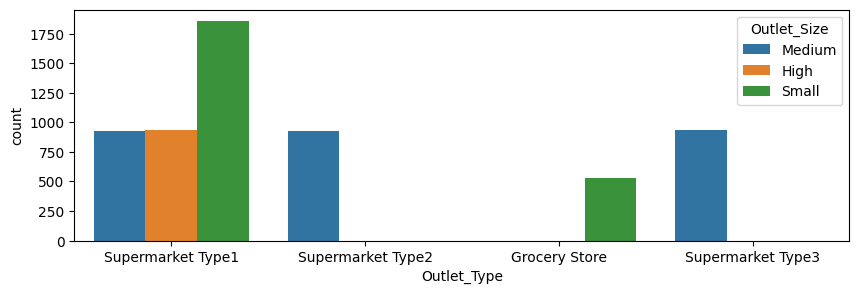

In [229]:
# Make bar graphs 
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=data_filled,x='Outlet_Type',hue='Outlet_Size')

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

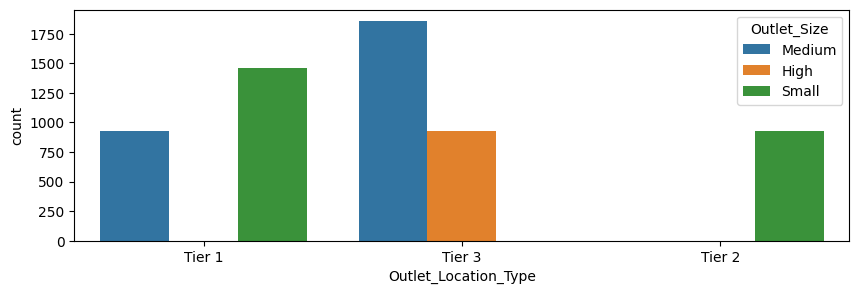

In [195]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=data_filled,x='Outlet_Location_Type',hue='Outlet_Size')

In [212]:
# Look at the rows with NaN for Outlet_Size :
filter2=data['Outlet_Size'].isnull()
data[filter2].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.38,1,0


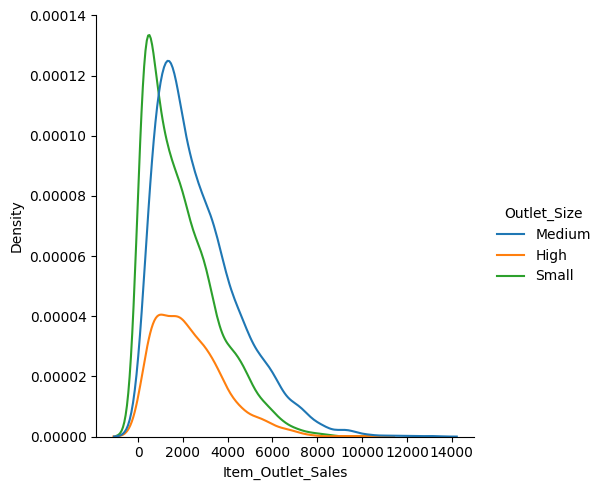

In [232]:
# fig, ax = plt.subplots(figsize=(10,3))
sns.displot(data,hue='Outlet_Size',x='Item_Outlet_Sales',kind='kde')


In [233]:
# Unable to find variables that could reliably predict Outlet_Size; thus, leave null values as Nan
data_filled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_missing_indicator,Item_Weight_missing_indicator
0,FDA15,13.426069,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,11.847460,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,12.817344,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,13.224769,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1,0
4,NCD19,13.384736,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,12.987880,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,0
8519,FDS36,12.277108,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,1,0
8520,NCJ29,13.142314,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,0
8521,FDN46,12.987880,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,0
